## Recurrent Neural Network - RNN
- Can deal with sequence data
- Variants: LSTM, GRU
> [Suggested Readings for beginner](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
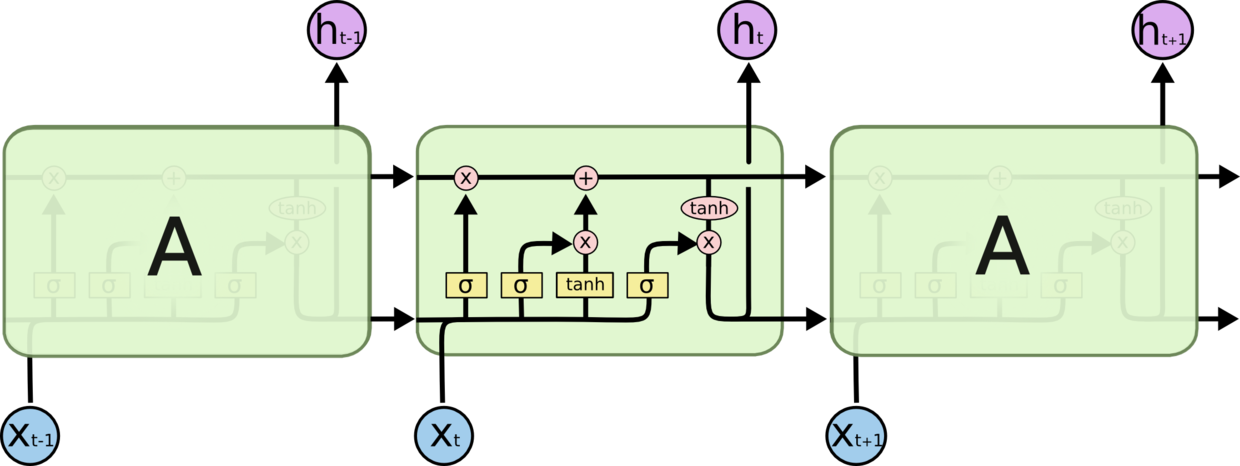

In [1]:
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.layers import Dense, Activation


Using TensorFlow backend.


In [8]:
## Reshape nor_x_train
n_input = 28
n_step = 28

rnn_x_train = nor_x_train.reshape(-1, n_step, n_input) # We will input 28 * 28 to RNN by 28 pixel at first step, 
rnn_x_test = nor_x_test.reshape(-1, n_step, n_input)   # and next 28 at second step, ... until 28th step, 
                                                       # then we are done with one input sample(image).

In [12]:
n_hidden = 128
learning_rate = 0.001
training_iters = 5 #20
batch_size = 128


model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, n_step, n_input),
               unroll=True))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [16]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(rnn_x_train, vec_y_train,
          batch_size=batch_size,
          epochs=training_iters,
          verbose=1,
          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 49s - loss: 0.6320 - acc: 0.7901 - val_loss: 0.2080 - val_acc: 0.9353
Epoch 2/5
48000/48000 [==============================] - 42s - loss: 0.1790 - acc: 0.9461 - val_loss: 0.1235 - val_acc: 0.9626
Epoch 3/5
48000/48000 [==============================] - 42s - loss: 0.1193 - acc: 0.9638 - val_loss: 0.0944 - val_acc: 0.9722
Epoch 4/5
48000/48000 [==============================] - 42s - loss: 0.0937 - acc: 0.9720 - val_loss: 0.0902 - val_acc: 0.9730
Epoch 5/5
48000/48000 [==============================] - 43s - loss: 0.0727 - acc: 0.9779 - val_loss: 0.0816 - val_acc: 0.9748


In [ ]:
scores = model.evaluate(rnn_x_test, vec_y_test, verbose=0)
print('LSTM test score:', scores[0])
print('LSTM test accuracy:', scores[1])

In [ ]:
rnn_pred_index = 5
rnn_pred = model.predict_on_batch(nor_x_test_reshape[rnn_pred_index].reshape(-1, 28, 28))
plt.imshow(x_test[rnn_pred_index], cmap="gray")
print("Label is {}.".format(np.argmax(rnn_pred)))